In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "valle d'aosta"

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
1,2020-02-26T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
2,2020-02-27T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,2.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
3,2020-02-28T18:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
4,2020-02-29T17:00:00,2,Valle d'Aosta,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2021-02-17T17:00:00,2,Valle d'Aosta,8,2,10,121,131,5,14,...,0.0,322.0,95.0,5.0,20.00,7.63,4.35,14.74,0.0,3.97
359,2021-02-18T17:00:00,2,Valle d'Aosta,10,2,12,124,136,5,11,...,0.0,283.0,98.0,3.0,16.67,8.82,3.89,11.22,0.0,3.82
360,2021-02-19T17:00:00,2,Valle d'Aosta,9,2,11,122,133,-3,8,...,0.0,324.0,174.0,-2.0,18.18,8.27,2.47,4.60,0.0,-2.21
361,2021-02-20T17:00:00,2,Valle d'Aosta,8,1,9,125,134,1,4,...,1.0,252.0,119.0,3.0,11.11,6.72,1.59,3.36,-50.0,0.75


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 5
Nuovi tamponi: 259.0
Percentuale nuovi positivi/nuovi tamponi: 1.9 %
Nuovi guariti: 6.0
Nuovi deceduti: 0.0
Variazione positivi ricoverati con sintomi: -2.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 1.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 21, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-23T17:00:00,2,Valle d'Aosta,84,4,88,342,430,-26,11,...,2.0,223.0,145.0,-19.0,4.55,20.47,4.93,7.59,-20.0,-5.70
1,2020-12-24T17:00:00,2,Valle d'Aosta,83,4,87,340,427,-3,35,...,1.0,248.0,131.0,-2.0,4.60,20.37,14.11,26.72,0.0,-0.70
2,2020-12-25T17:00:00,2,Valle d'Aosta,84,4,88,340,428,1,11,...,0.0,101.0,33.0,0.0,4.55,20.56,10.89,33.33,0.0,0.23
3,2020-12-26T17:00:00,2,Valle d'Aosta,77,4,81,337,418,-10,24,...,1.0,139.0,41.0,-3.0,4.94,19.38,17.27,58.54,0.0,-2.34
4,2020-12-27T17:00:00,2,Valle d'Aosta,83,2,85,347,432,14,27,...,2.0,365.0,125.0,10.0,2.35,19.68,7.40,21.60,-50.0,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-17T17:00:00,2,Valle d'Aosta,8,2,10,121,131,5,14,...,0.0,322.0,95.0,5.0,20.00,7.63,4.35,14.74,0.0,3.97
57,2021-02-18T17:00:00,2,Valle d'Aosta,10,2,12,124,136,5,11,...,0.0,283.0,98.0,3.0,16.67,8.82,3.89,11.22,0.0,3.82
58,2021-02-19T17:00:00,2,Valle d'Aosta,9,2,11,122,133,-3,8,...,0.0,324.0,174.0,-2.0,18.18,8.27,2.47,4.60,0.0,-2.21
59,2021-02-20T17:00:00,2,Valle d'Aosta,8,1,9,125,134,1,4,...,1.0,252.0,119.0,3.0,11.11,6.72,1.59,3.36,-50.0,0.75


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

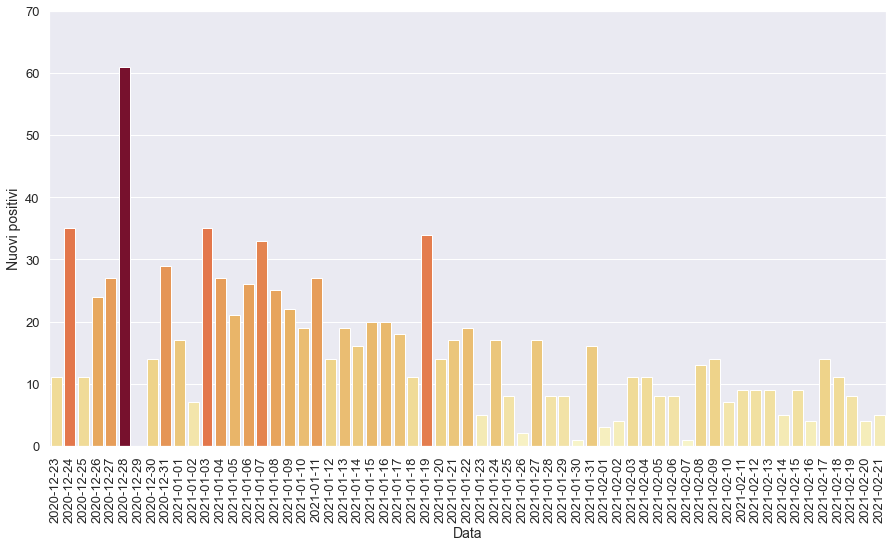

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

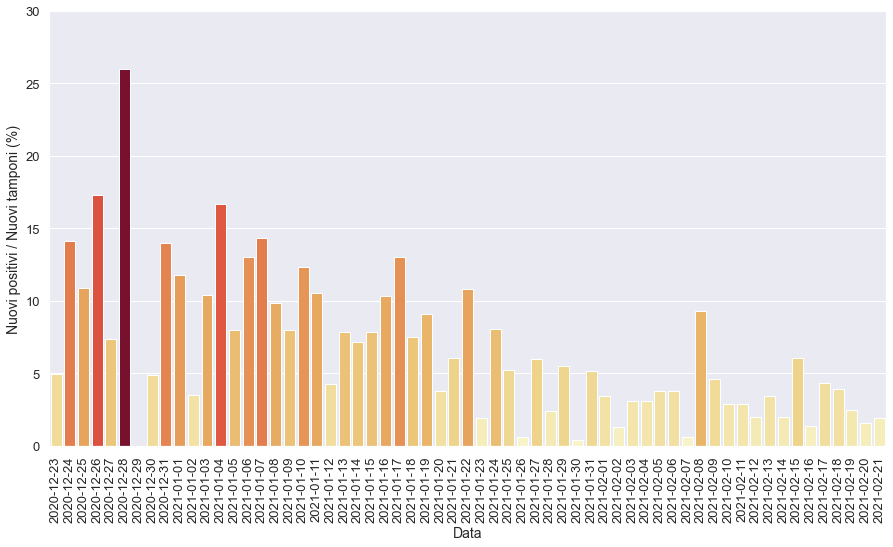

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

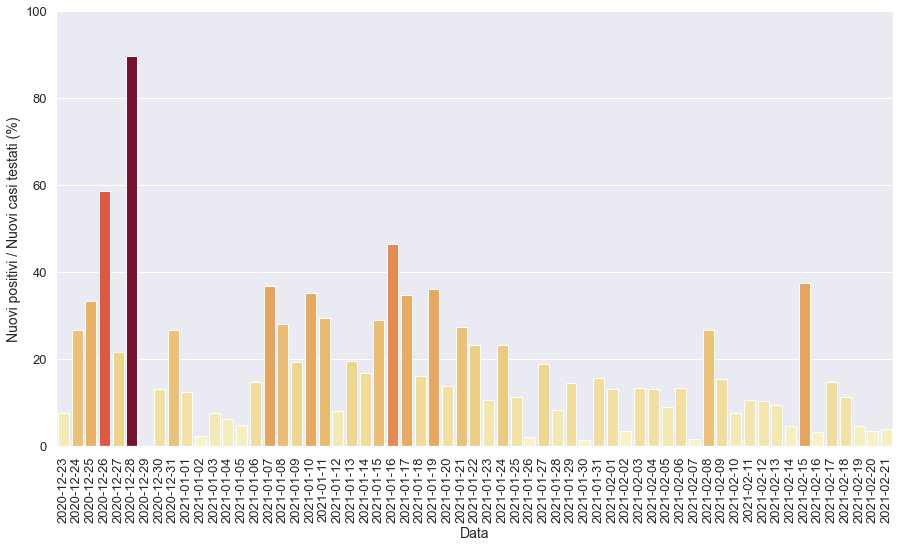

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

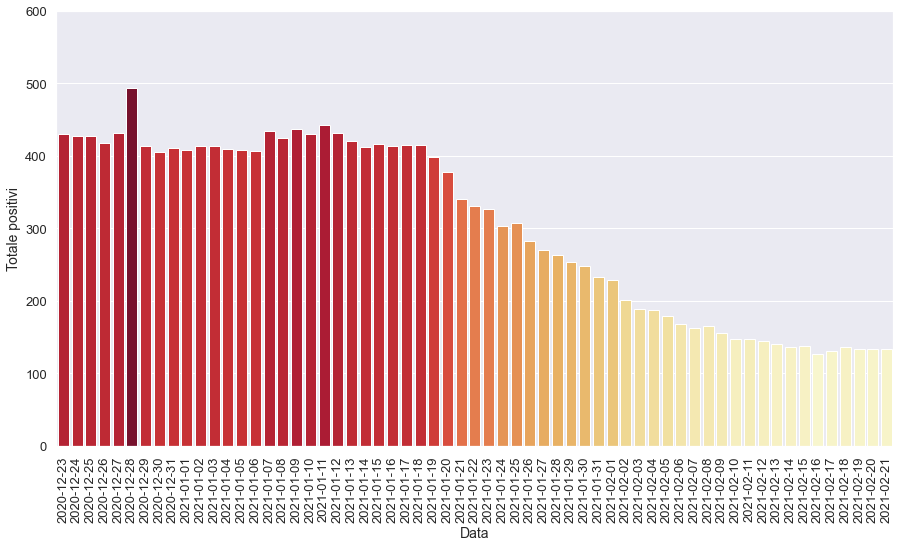

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

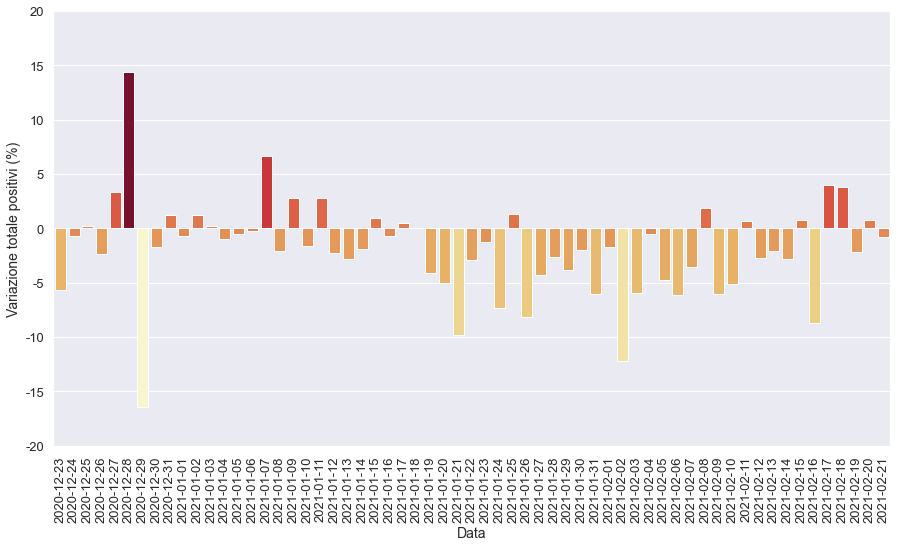

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

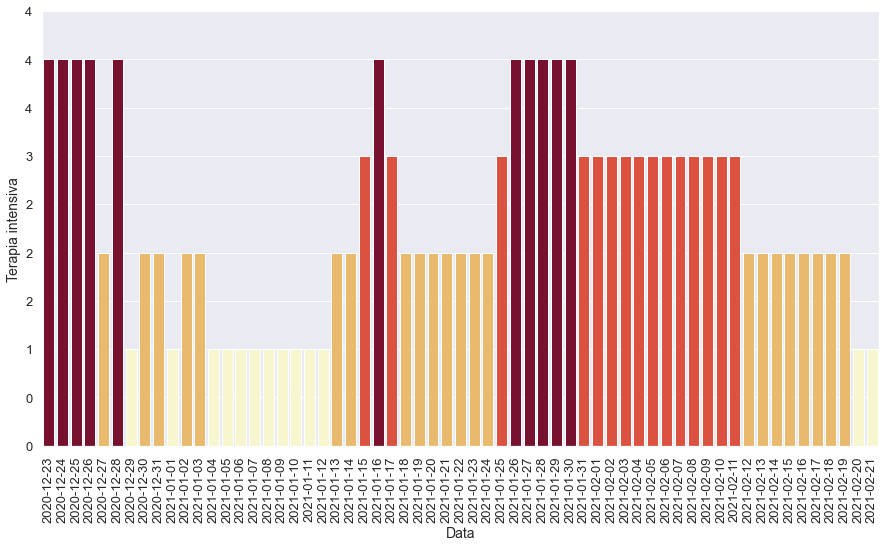

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

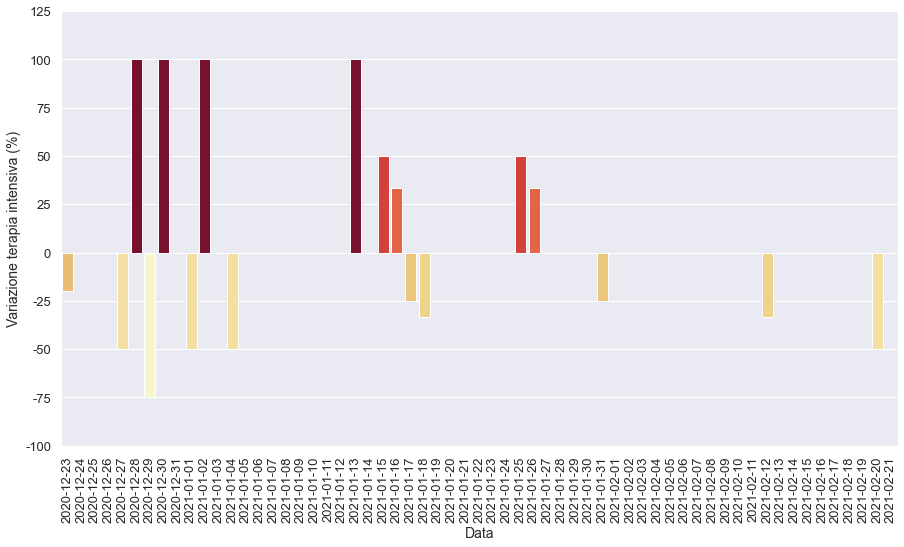

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

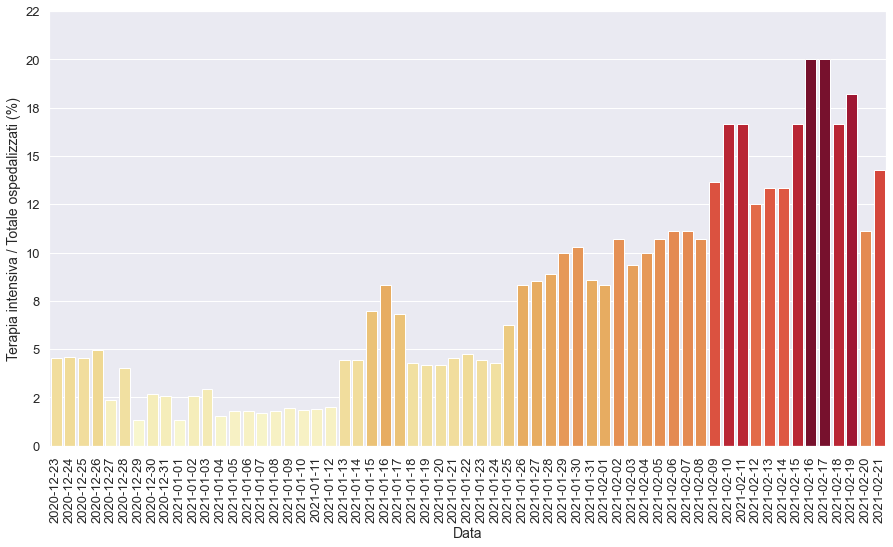

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

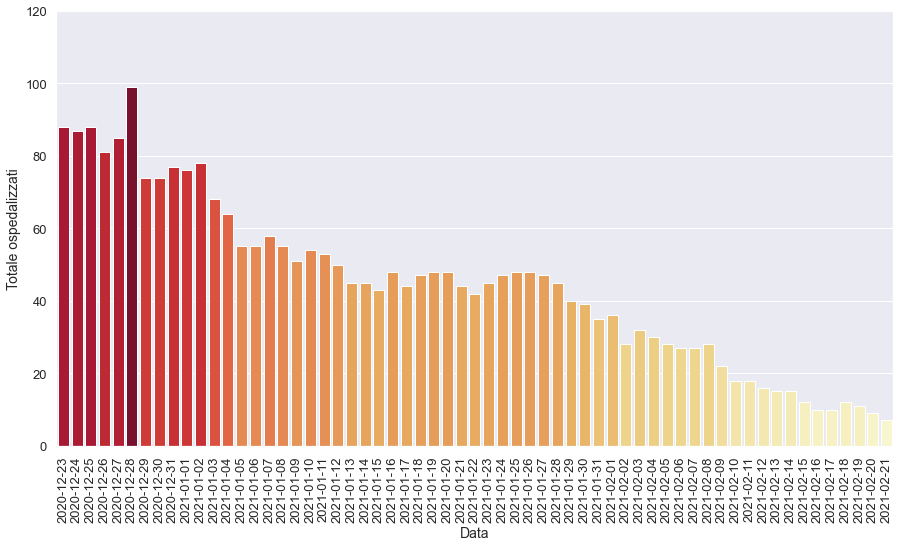

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

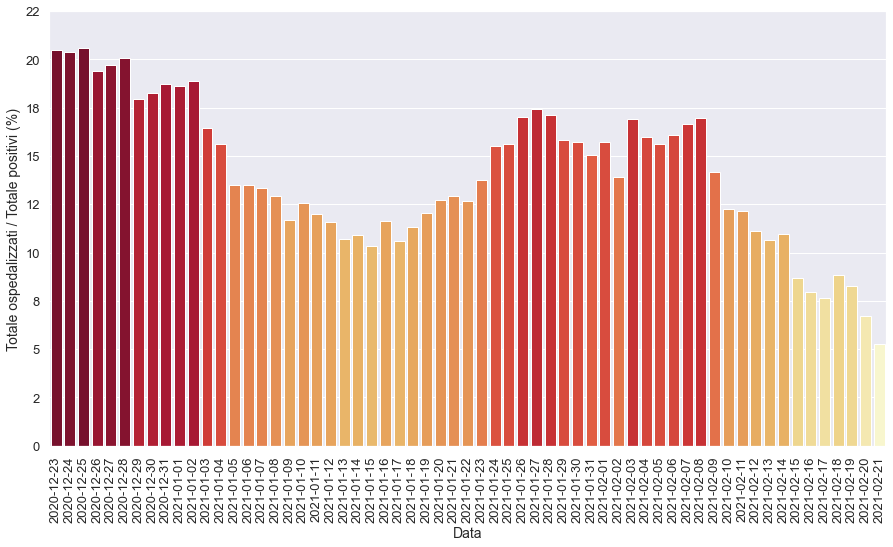

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

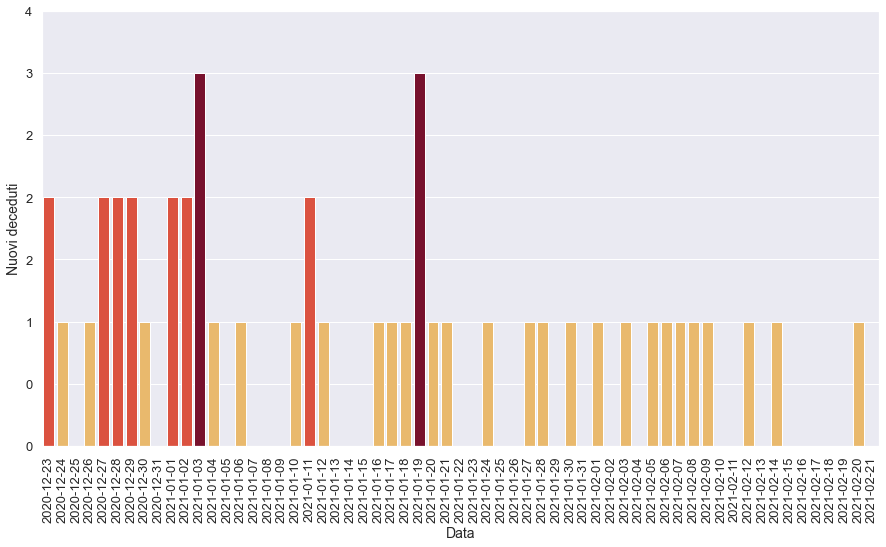

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

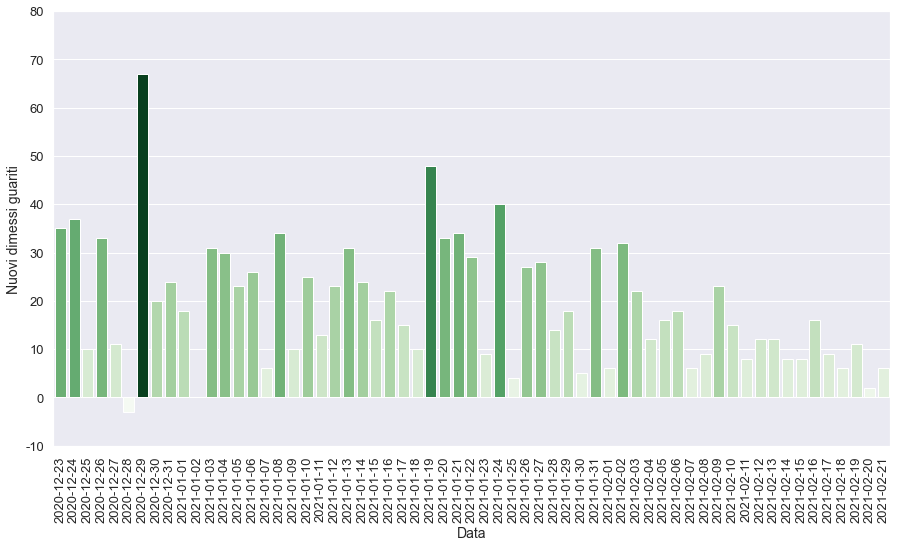

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-22T17:00:00,2,Valle d'Aosta,40,2,42,289,331,-10,19,...,0.0,176.0,82.0,-8.0,4.76,12.69,10.80,23.17,0.00,-2.93
1,2021-01-23T17:00:00,2,Valle d'Aosta,43,2,45,282,327,-4,5,...,0.0,258.0,48.0,-7.0,4.44,13.76,1.94,10.42,0.00,-1.21
2,2021-01-24T17:00:00,2,Valle d'Aosta,45,2,47,256,303,-24,17,...,1.0,211.0,73.0,-26.0,4.26,15.51,8.06,23.29,0.00,-7.34
3,2021-01-25T17:00:00,2,Valle d'Aosta,45,3,48,259,307,4,8,...,0.0,152.0,71.0,3.0,6.25,15.64,5.26,11.27,50.00,1.32
4,2021-01-26T17:00:00,2,Valle d'Aosta,44,4,48,234,282,-25,2,...,0.0,317.0,103.0,-25.0,8.33,17.02,0.63,1.94,33.33,-8.14
5,2021-01-27T17:00:00,2,Valle d'Aosta,43,4,47,223,270,-12,17,...,1.0,284.0,90.0,-11.0,8.51,17.41,5.99,18.89,0.00,-4.26
6,2021-01-28T17:00:00,2,Valle d'Aosta,41,4,45,218,263,-7,8,...,1.0,338.0,97.0,-5.0,8.89,17.11,2.37,8.25,0.00,-2.59
7,2021-01-29T17:00:00,2,Valle d'Aosta,36,4,40,213,253,-10,8,...,0.0,146.0,55.0,-5.0,10.00,15.81,5.48,14.55,0.00,-3.80
8,2021-01-30T17:00:00,2,Valle d'Aosta,35,4,39,209,248,-5,1,...,1.0,235.0,74.0,-4.0,10.26,15.73,0.43,1.35,0.00,-1.98
9,2021-01-31T17:00:00,2,Valle d'Aosta,32,3,35,198,233,-15,16,...,0.0,308.0,103.0,-11.0,8.57,15.02,5.19,15.53,-25.00,-6.05


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

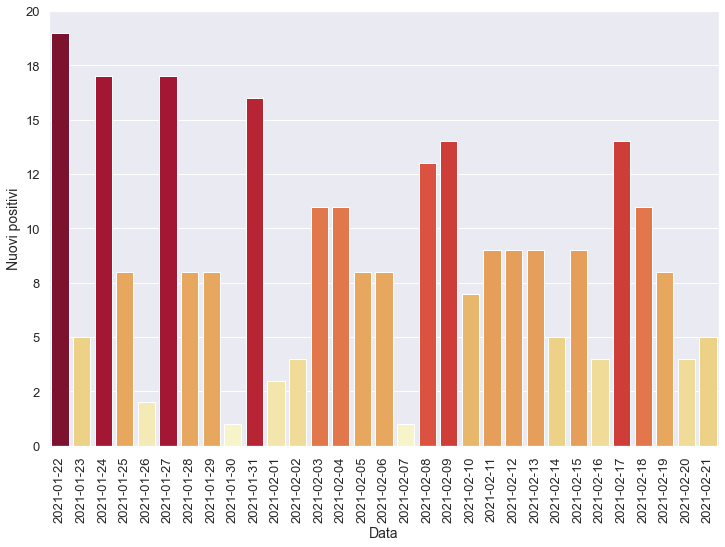

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

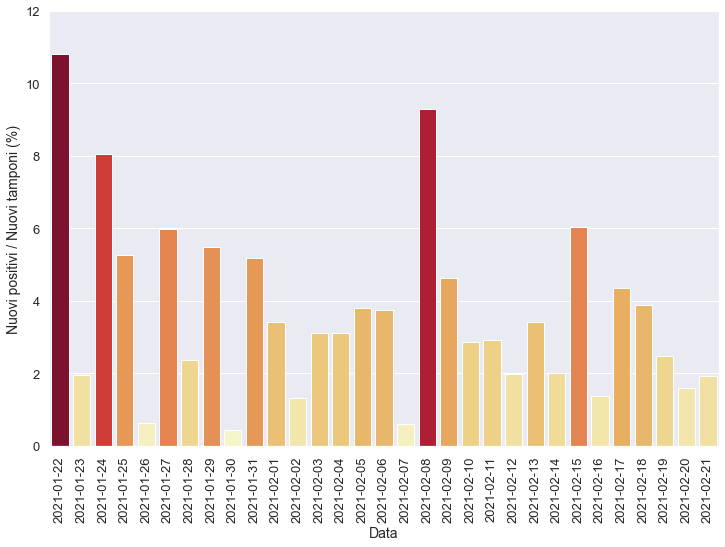

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

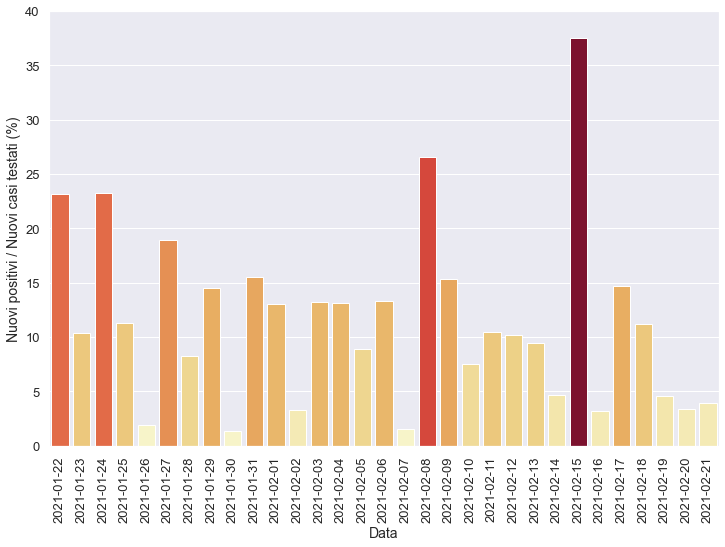

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

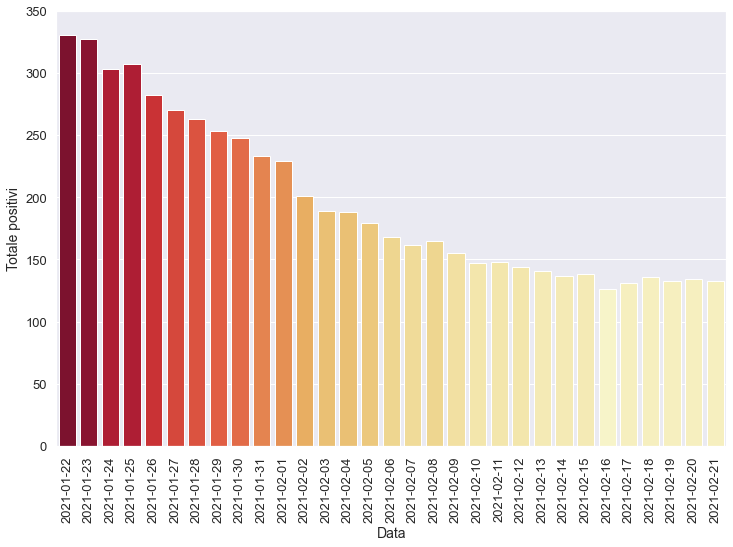

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

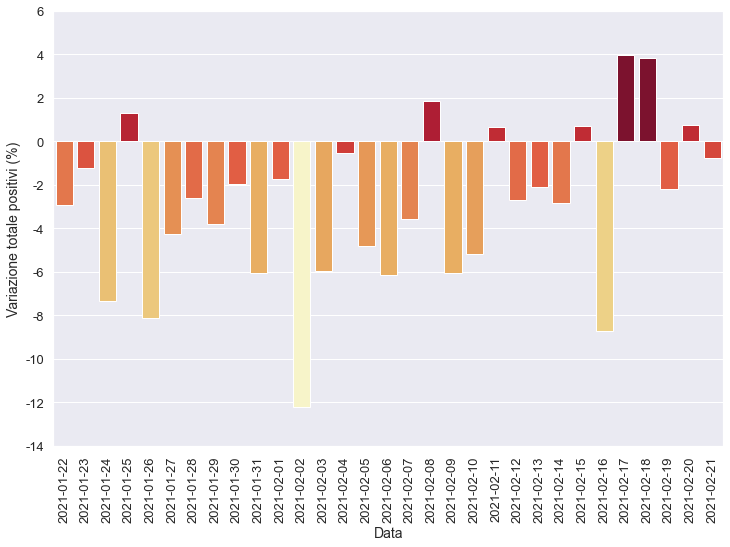

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

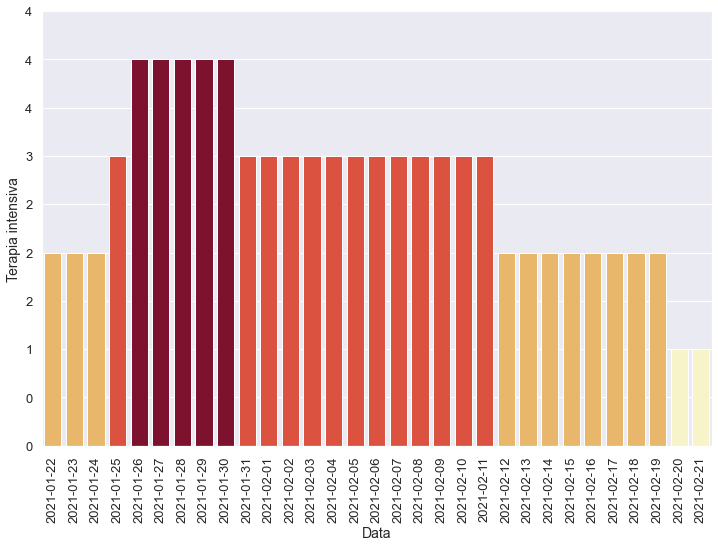

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

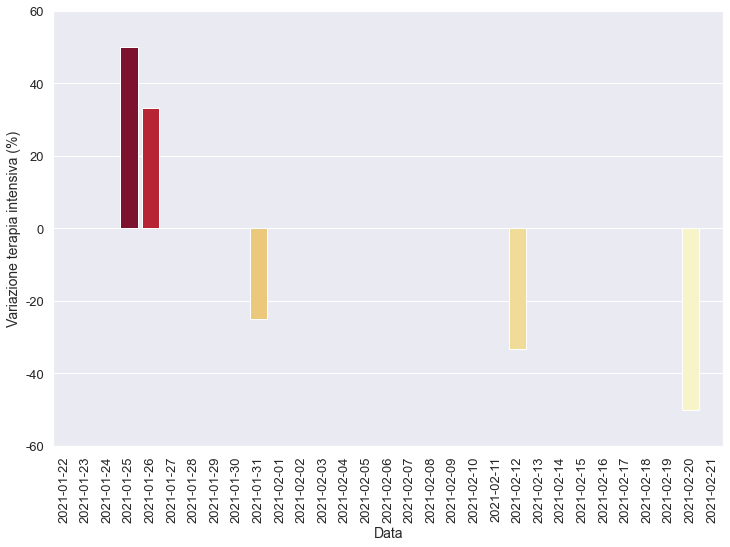

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

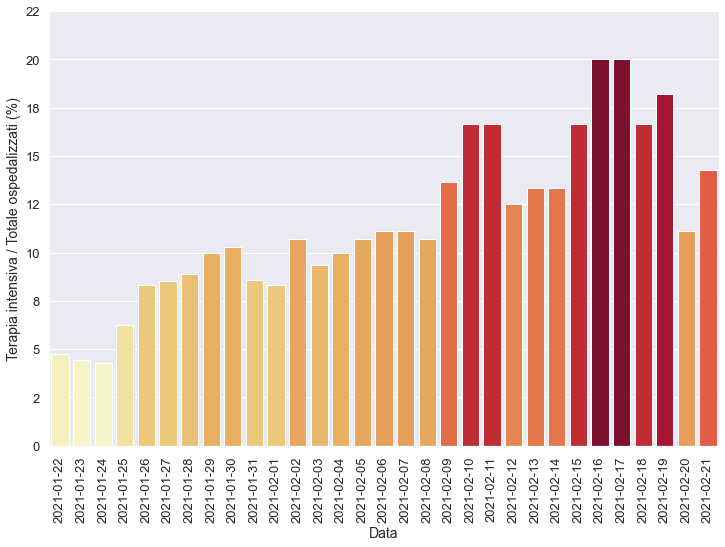

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

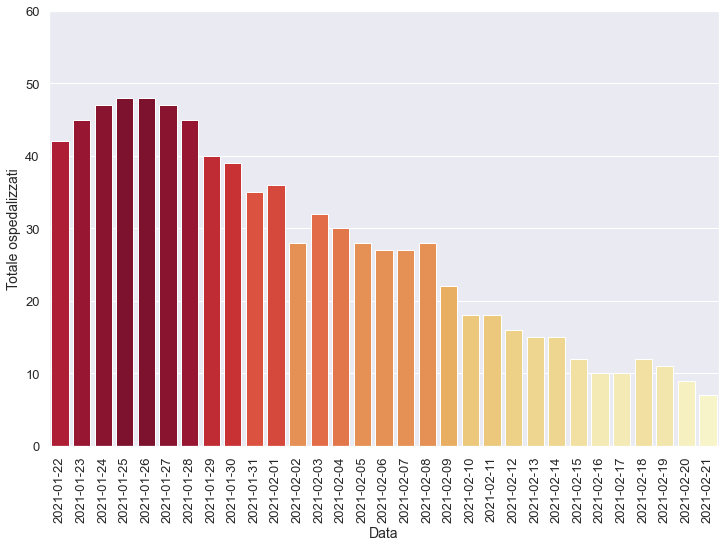

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

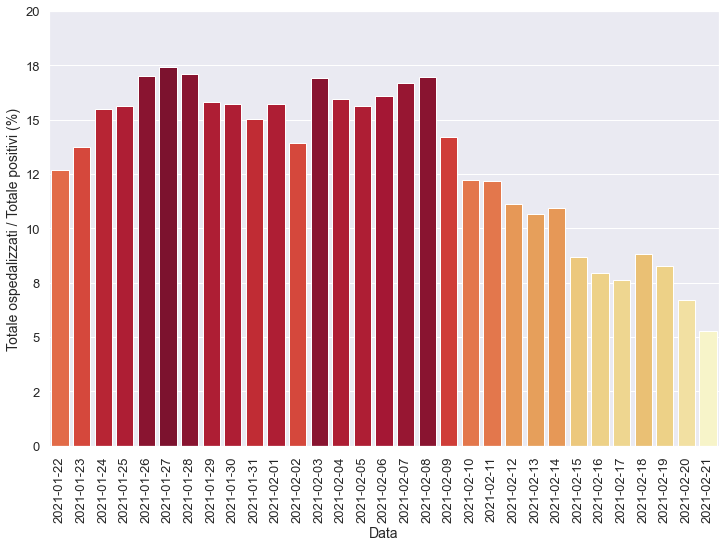

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

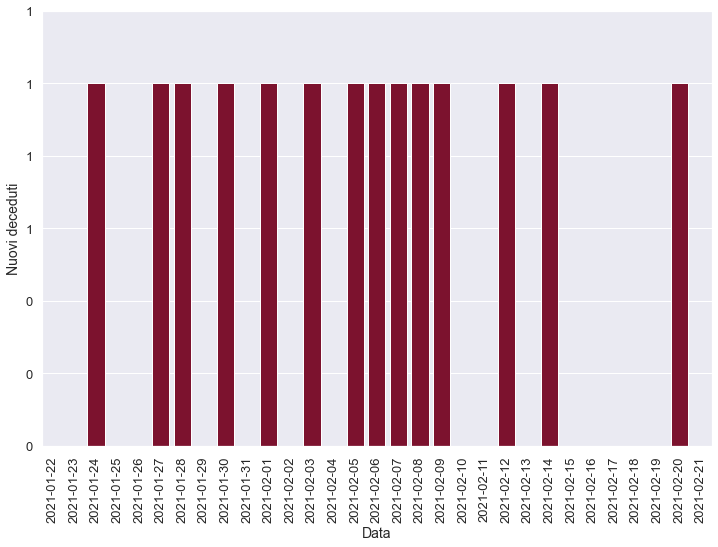

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

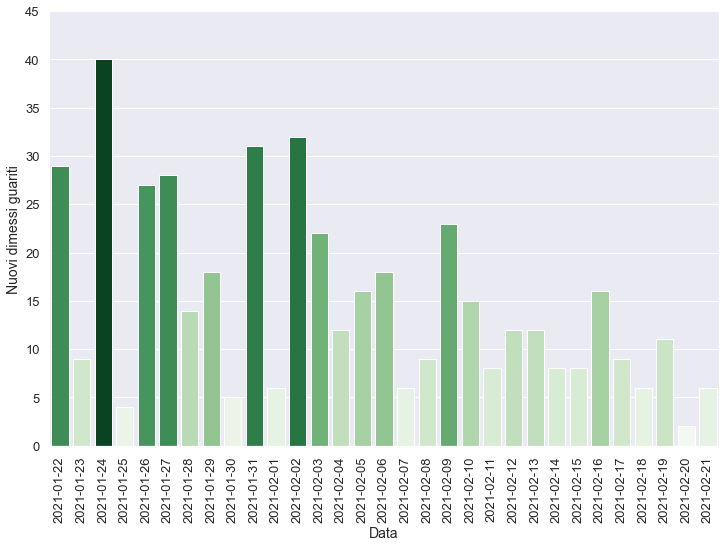

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,2,Valle d'Aosta,13,2,15,122,137,-4,5,...,1.0,247.0,108.0,-4.0,13.33,10.95,2.02,4.63,0.0,-2.84
1,2021-02-15T17:00:00,2,Valle d'Aosta,10,2,12,126,138,1,9,...,0.0,149.0,24.0,4.0,16.67,8.70,6.04,37.50,0.0,0.73
2,2021-02-16T17:00:00,2,Valle d'Aosta,8,2,10,116,126,-12,4,...,0.0,292.0,124.0,-10.0,20.00,7.94,1.37,3.23,0.0,-8.70
3,2021-02-17T17:00:00,2,Valle d'Aosta,8,2,10,121,131,5,14,...,0.0,322.0,95.0,5.0,20.00,7.63,4.35,14.74,0.0,3.97
4,2021-02-18T17:00:00,2,Valle d'Aosta,10,2,12,124,136,5,11,...,0.0,283.0,98.0,3.0,16.67,8.82,3.89,11.22,0.0,3.82
5,2021-02-19T17:00:00,2,Valle d'Aosta,9,2,11,122,133,-3,8,...,0.0,324.0,174.0,-2.0,18.18,8.27,2.47,4.60,0.0,-2.21
6,2021-02-20T17:00:00,2,Valle d'Aosta,8,1,9,125,134,1,4,...,1.0,252.0,119.0,3.0,11.11,6.72,1.59,3.36,-50.0,0.75
7,2021-02-21T17:00:00,2,Valle d'Aosta,6,1,7,126,133,-1,5,...,0.0,259.0,126.0,1.0,14.29,5.26,1.93,3.97,0.0,-0.75


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

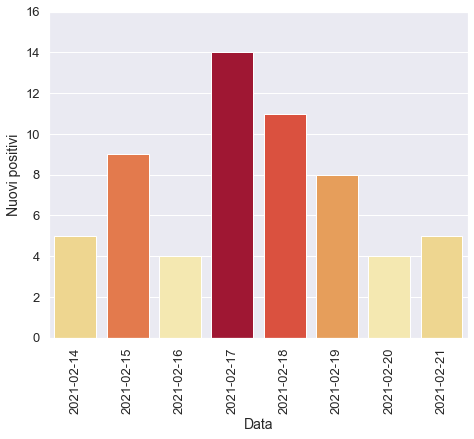

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

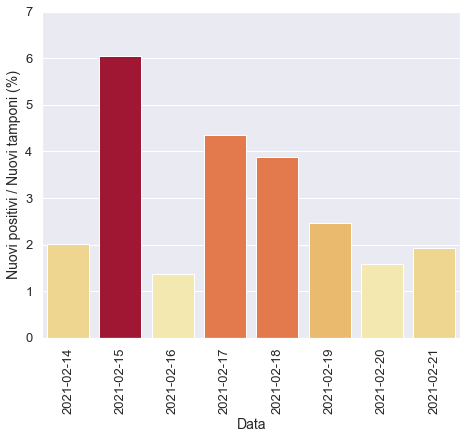

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

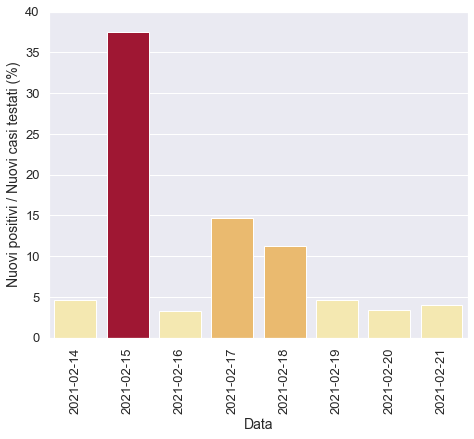

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

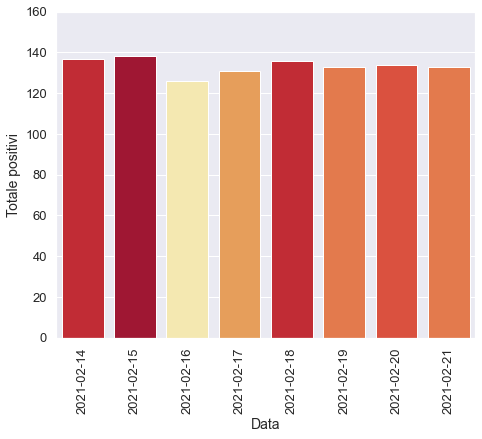

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

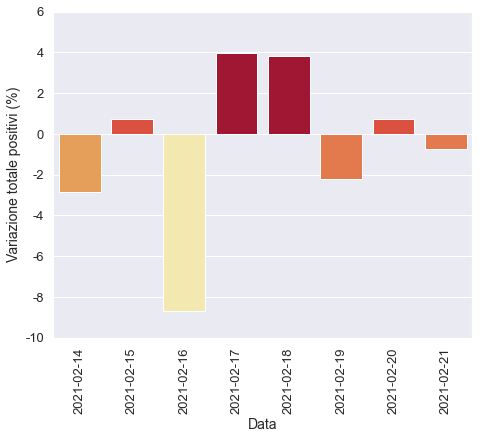

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

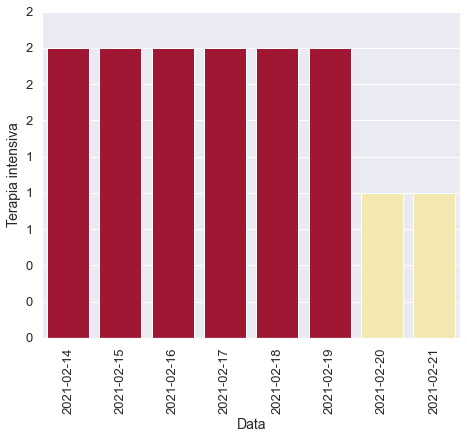

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

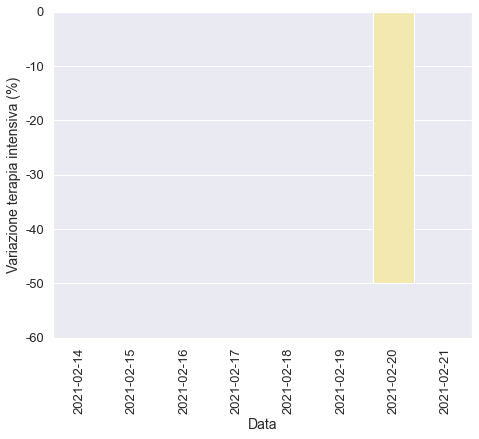

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

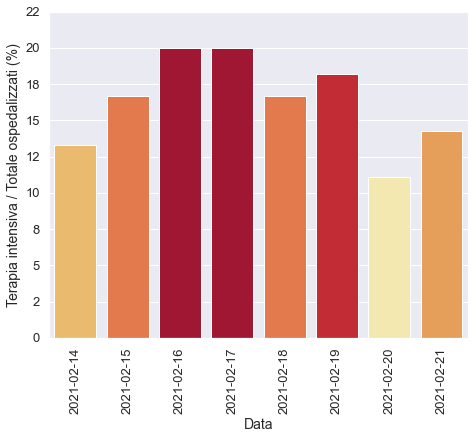

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

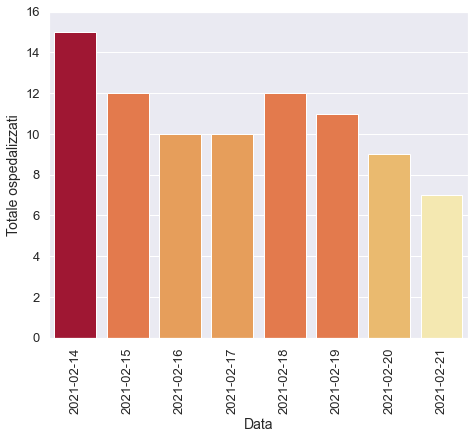

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

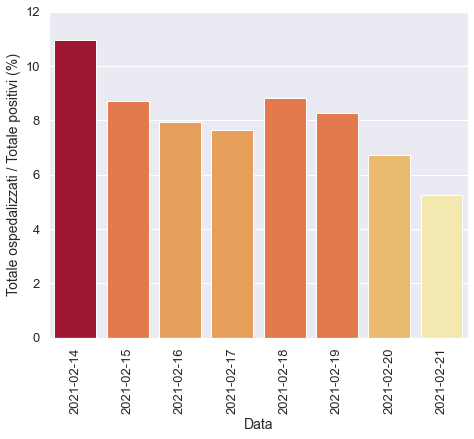

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

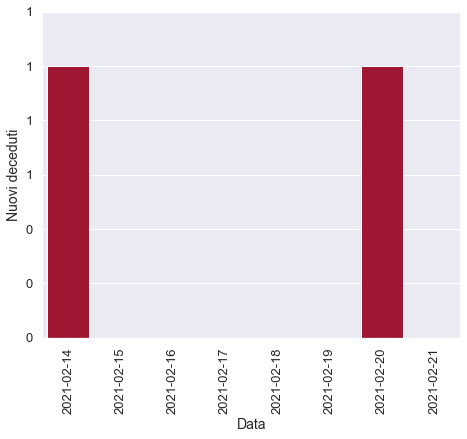

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

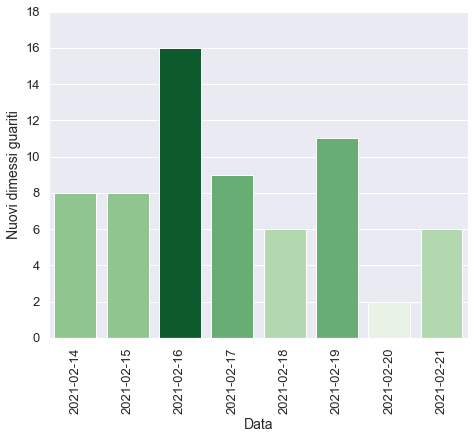

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)